# House Pricing Case Study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know:

Which variables are significant in predicting the price of a house, and  
How well those variables describe the price of a house.  
Also, determine the optimal value of lambda for ridge and lasso regression.


## Basic Data Understanding

In [567]:
#Setup prerequisite - This code assumes the 'loan.csv file is present in the local location as this python file'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#Read the data and try to get a basic understanding of the dataset
house = pd.read_csv('train.csv')

print("Number of Rows and Columns in this dataset :",house.shape)
print("The Columns in this data set are :",house.columns.values)


Number of Rows and Columns in this dataset : (1460, 81)
The Columns in this data set are : ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' '

In [568]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleanup

### Get a summary of the columns that have null values

In [569]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Drop columns that have 95% or more as null values

In [570]:
house = house.dropna(axis='columns',thresh=0.95*len(house))

In [571]:
house.shape

(1460, 70)

### Null value Treatment

In [572]:
house['BsmtQual'].fillna('No Basement', inplace=True) 
house['BsmtCond'].fillna('No Basement', inplace=True) 
house['BsmtExposure'].fillna('No Basement', inplace=True) 
house['BsmtFinType1'].fillna('No Basement', inplace=True) 
house['BsmtFinType2'].fillna('No Basement', inplace=True) 
house['MasVnrType'].fillna('None',inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)
house = house.dropna(how ='any')

### Analyse and see if there are any columns that predominantly have only single values. They are not going to be much helpful for our analysis

In [573]:
house.columns[house.nunique() <= 1]    

Index([], dtype='object')

There are no columns with single values

### Express some of the columns as categorical string values

In [574]:

#house['MSSubClass']=house.MSSubClass.map({20: 'OneStory1946AndNew',30: 'OneStory1945AndOlder',40: 'OneStoryFinishedAttic',\
#       45: 'OneHalfStoryUnfinish',50:'OneHalfStoryFinish',\
#       60: 'TwoStory1946AndNewer',70: 'TwoStory1945AndOlder',\
#       75: 'TwoHalfStory', 80: 'MultiLevel', 85: 'SplitFoyer', 90: 'Duplex',\
#       120: 'OneStoryPud1946AndNew', 150: 'OneHalfStoryPud', 160: 'TwoStoryPud1946AndNew',\
#       180: 'MultiLvelPud', 190: 'TwoFamilyConv'})

house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [575]:
# Bin the Years
#bins = [1900,1920, 1940, 1960, 1980,2000,2020]
#bucket = [ '1900-1920', '1920-1940', '1940-1960','1960-1980','1980-2000','2000+']
#house['YearBuilt_bin'] = pd.cut(house['YearBuilt'], bins, labels=bucket)
#house['YearRemodAdd_bin'] = pd.cut(house['YearRemodAdd'], bins, labels=bucket)
#house['YrSold_bin'] = pd.cut(house['YrSold'], bins, labels=bucket)

#house.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

### Drop the columns that are not needed

In [576]:
#Dropping columns that are redundant or not needed
house.drop(['Id'],axis=1,inplace=True)

## Visual exploratory analysis

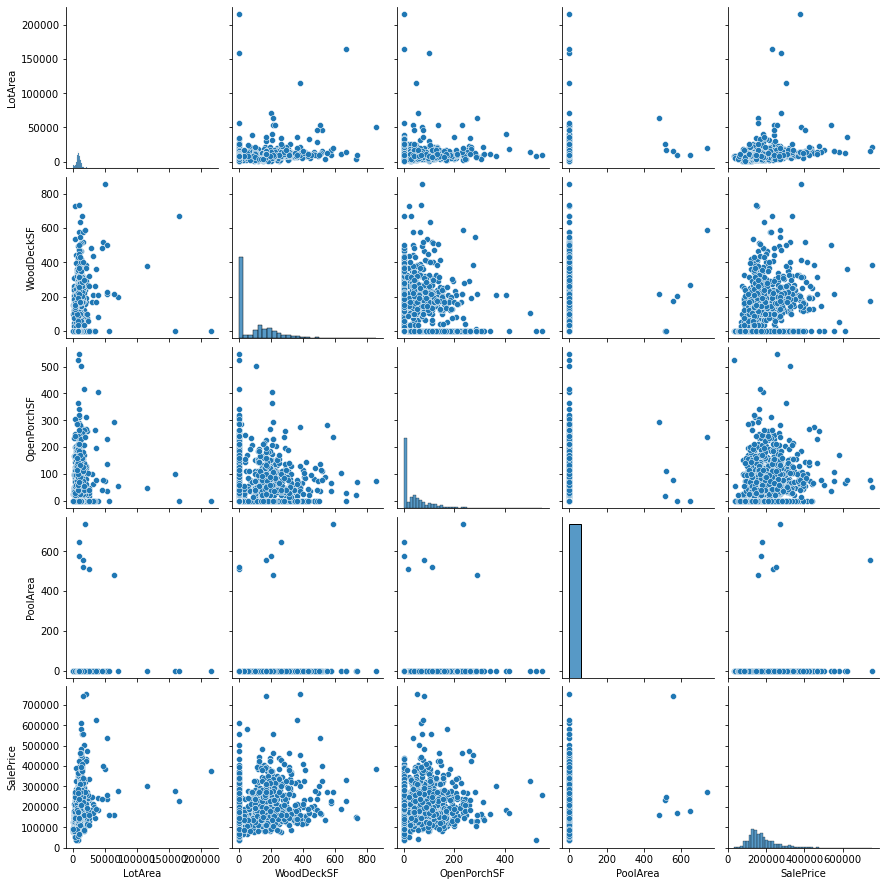

In [577]:
#Do a pairplot of all the numerical columns
sns.pairplot(house, vars=[ 'LotArea','WoodDeckSF','OpenPorchSF','PoolArea','SalePrice'])
plt.show()

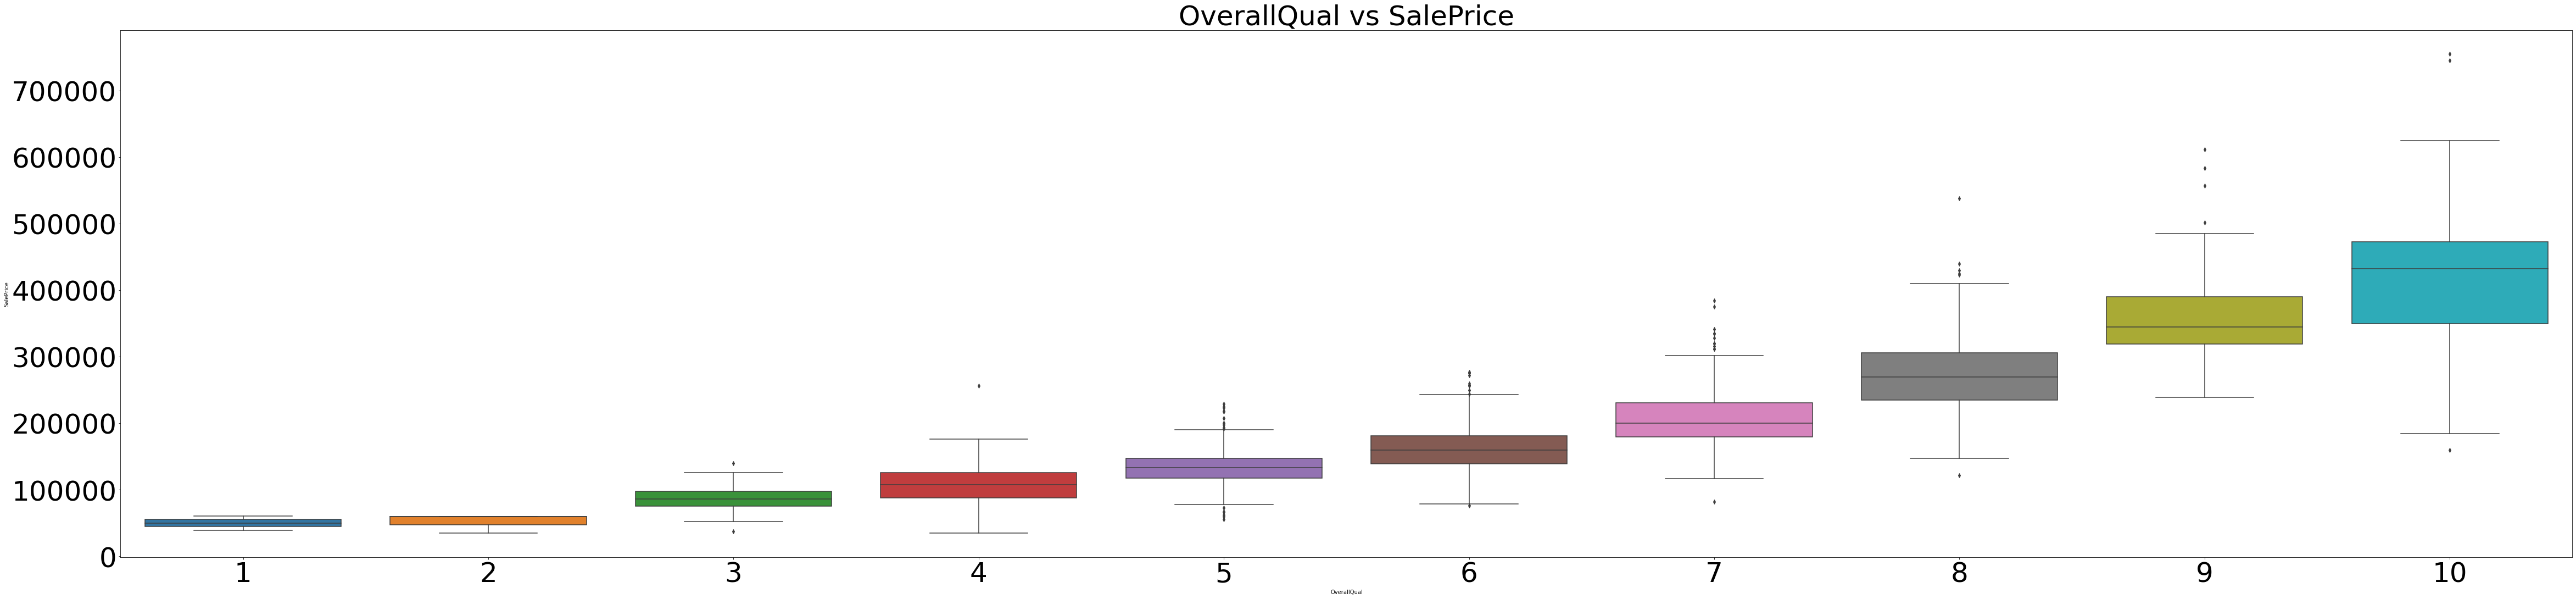

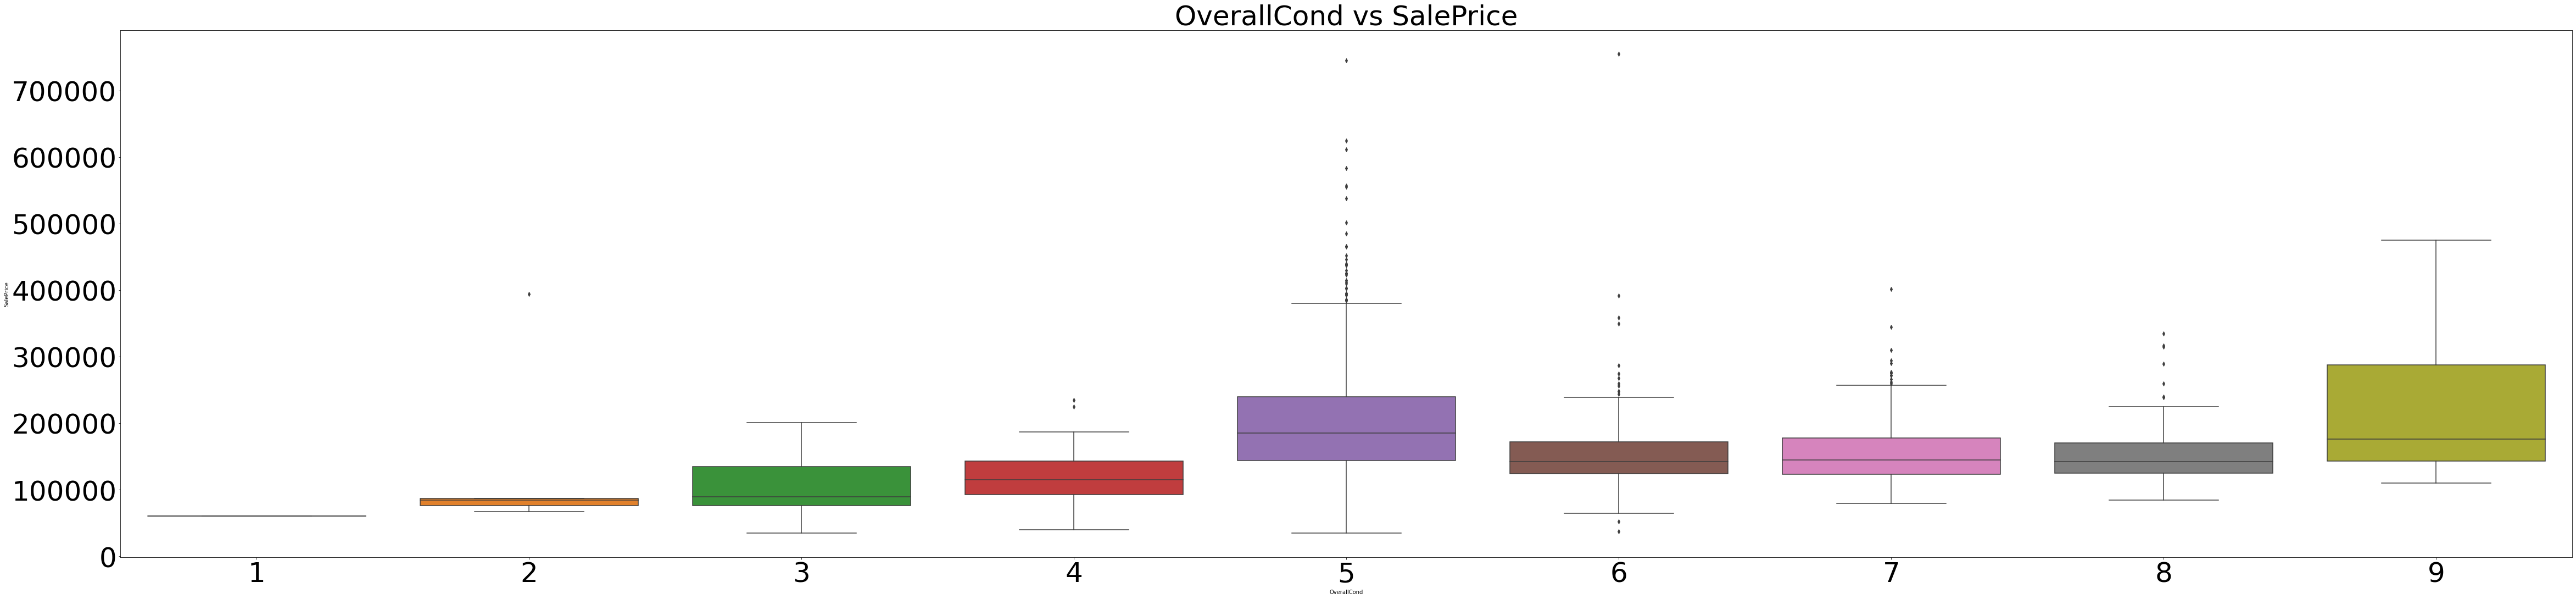

In [578]:
#Visualise the relationship between categorical variables and count using boxplot


plt.figure(figsize=(80, 60))

plt.subplot(3,1,1)
b = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house)
b.axes.set_title("OverallQual vs SalePrice",fontsize=50)
b.tick_params(labelsize=50)
plt.show()

plt.figure(figsize=(80, 60))
plt.subplot(3,1,2)
b= sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house)
b.axes.set_title("OverallCond vs SalePrice",fontsize=50)
b.tick_params(labelsize=50)
plt.show()



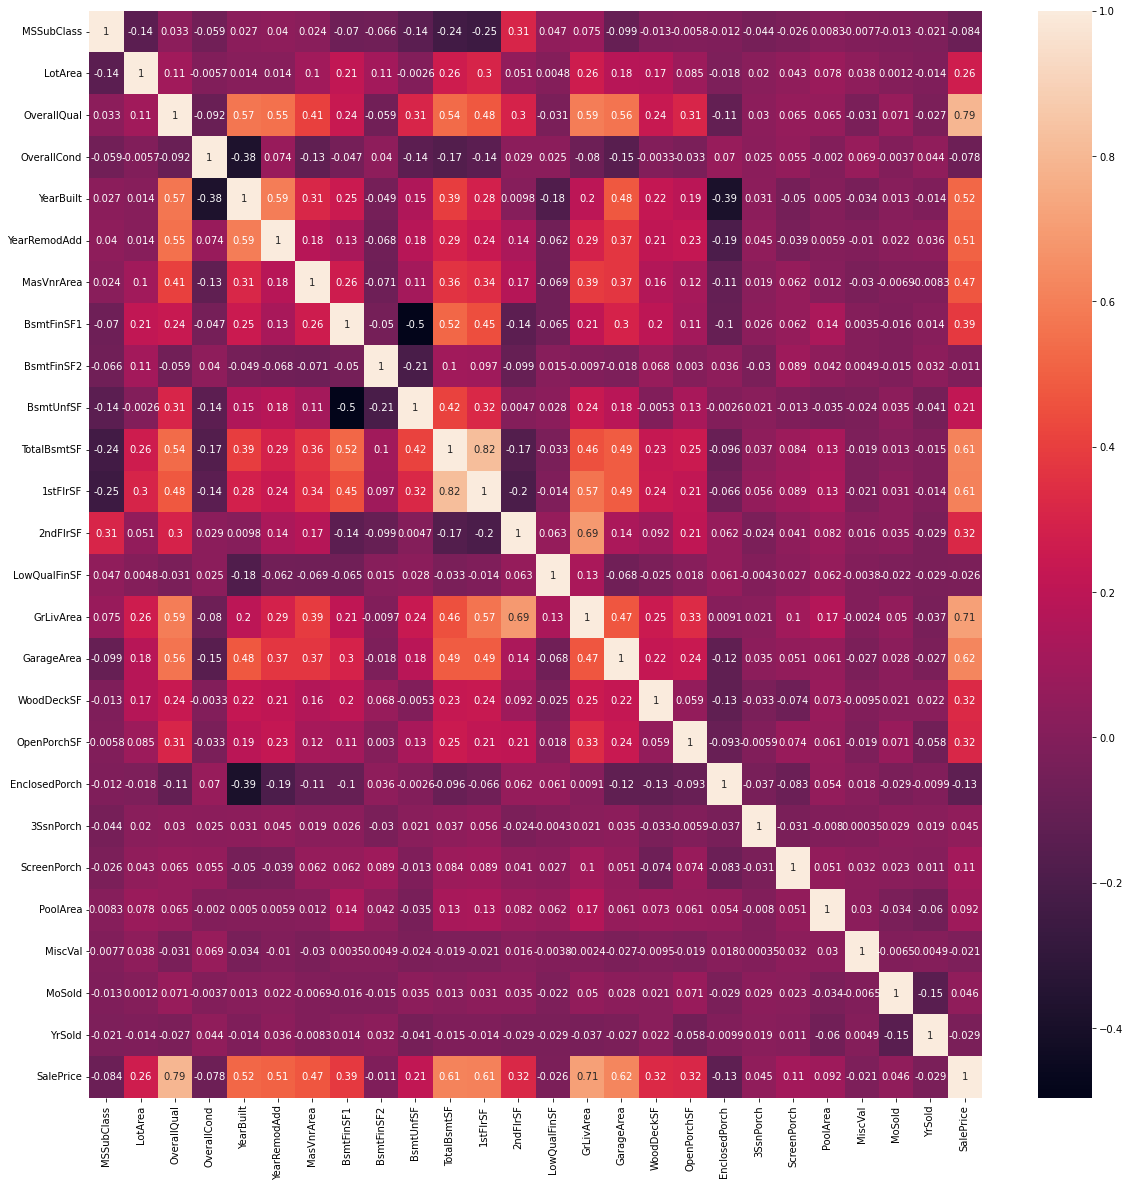

In [579]:
#Create a heatmap of the correlation
plt.figure(figsize = (20,20))
sns.heatmap(house.corr(),annot=True)
plt.show()

## Data Preparation

In [580]:
def add_dummies(colnames,df):
    for colname in colnames:
        dummy = pd.get_dummies(df[colname],colname,drop_first=True)
        df = pd.concat([df,dummy],axis=1)
        df.drop([colname],axis=1,inplace=True)
    return df

#Create dummy variables for categorical variables
#house = add_dummies(['MSSubClass','MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',\
#                    'Condition1','Condition2','BldgType','HouseStyle', 'YearBuilt_bin','YearRemodAdd_bin','RoofStyle',\
#                    'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',\
#                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',\
#                    'CentralAir','Electrical','KitchenQual','Functional','PavedDrive','YrSold_bin','SaleType','SaleCondition'],house)
house = add_dummies(['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',\
                    'Condition1','Condition2','BldgType','HouseStyle', 'RoofStyle',\
                    'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',\
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',\
                    'CentralAir','Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'],house)



house.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0

### Split the data to training and testing set

In [581]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
house_train, house_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

###  Scaling the features

In [582]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Apply scaling on numeric variables leaving the dummy variables
#num_vars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
#         'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
#         'PoolArea','MiscVal','SalePrice']

num_vars=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
         'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
         'PoolArea','MiscVal','SalePrice','YearBuilt','YearRemodAdd','YrSold']


#Fit on data
house_train[num_vars] = scaler.fit_transform(house_train[num_vars])
house_test[num_vars] = scaler.transform(house_test[num_vars])
house_train.head()

C:\Users\ssiva\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\ssiva\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.411765,0.040455,5,5,0.760870,0.450000,0.000,0.000000,0.000000,0.000000,0.000000,0.215278,0.209201,0.0,0.249039,0,0,2,0,4,2,8,0,2,0.380113,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,8,0.75,0.126510,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0

## Building the Model

In [583]:
#Divide in to X and y
y_train = house_train.pop('SalePrice')
X_train = house_train
y_test = house_test.pop('SalePrice')
X_test = house_test

### Ridge and Lasso Regression

### Ridge

In [584]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()


folds = 5
gs_cv = GridSearchCV(estimator = ridge, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
gs_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [585]:
#check optimum parameters
print(gs_cv.best_params_)
print(gs_cv.best_score_)

{'alpha': 5.0}
-0.027690763778198808


In [586]:
cv_res = pd.DataFrame(gs_cv.cv_results_)
cv_res = cv_res[cv_res['param_alpha']<=10]
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012308,0.000821,0.004003,0.000678,0.0001,{'alpha': 0.0001},-0.022986,-0.036661,-0.032575,-0.027965,-0.026154,-0.029268,0.004826,24,-0.017787,-0.016136,-0.017125,-0.018493,-0.017335,-0.017375,0.000777
1,0.012604,0.000554,0.003523,0.000444,0.001,{'alpha': 0.001},-0.023078,-0.036480,-0.032452,-0.027957,-0.026123,-0.029218,0.004734,23,-0.017824,-0.016147,-0.017126,-0.018494,-0.017357,-0.017390,0.000778
2,0.011180,0.001164,0.003235,0.000383,0.01,{'alpha': 0.01},-0.023873,-0.035106,-0.031595,-0.027881,-0.026212,-0.028934,0.003983,22,-0.018165,-0.016385,-0.017273,-0.018504,-0.017709,-0.017607,0.000739
3,0.012160,0.000207,0.003245,0.000381,0.05,{'alpha': 0.05},-0.025578,-0.032881,-0.030617,-0.027642,-0.027395,-0.028823,0.002594,20,-0.019104,-0.017732,-0.018342,-0.018541,-0.019046,-0.018553,0.000503
4,0.012982,0.002354,0.003632,0.001312,0.1,{'alpha': 0.1},-0.026316,-0.032017,-0.030312,-0.027489,-0.028068,-0.028840,0.002052,21,-0.019666,-0.018663,-0.019188,-0.018593,-0.019895,-0.019201,0.000521
5,0.013201,0.001940,0.003800,0.000748,0.2,{'alpha': 0.2},-0.026858,-0.031276,-0.029804,-0.027306,-0.028608,-0.028770,0.001623,19,-0.020208,-0.019599,-0.019986,-0.018715,-0.020643,-0.019830,0.000652
6,0.013437,0.001479,0.003559,0.000463,0.3,{'alpha': 0.3},-0.027013,-0.030963,-0.029510,-0.027188,-0.028792,-0.028693,0.001478,18,-0.020522,-0.020078,-0.020390,-0.018836,-0.021010,-0.020167,0.000730
7,0.012527,0.000780,0.003800,0.000749,0.4,{'alpha': 0.4},-0.027035,-0.030819,-0.029300,-0.027084,-0.028842,-0.028616,0.001429,17,-0.020755,-0.020378,-0.020644,-0.018947,-0.021263,-0.020397,0.000780
8,0.013580,0.000754,0.003964,0.000643,0.5,{'alpha': 0.5},-0.027002,-0.030679,-0.029138,-0.027002,-0.028846,-0.028533,0.001397,16,-0.020948,-0.020595,-0.020821,-0.019062,-0.021442,-0.020574,0.000805
9,0.013206,0.000556,0.004332,0.000724,0.6,{'alpha': 0.6},-0.026954,-0.030555,-0.029022,-0.026931,-0.028825,-0.028458,0.001374,15,-0.021114,-0.020769,-0.020957,-0.019176,-0.021582,-0.020720,0.000818


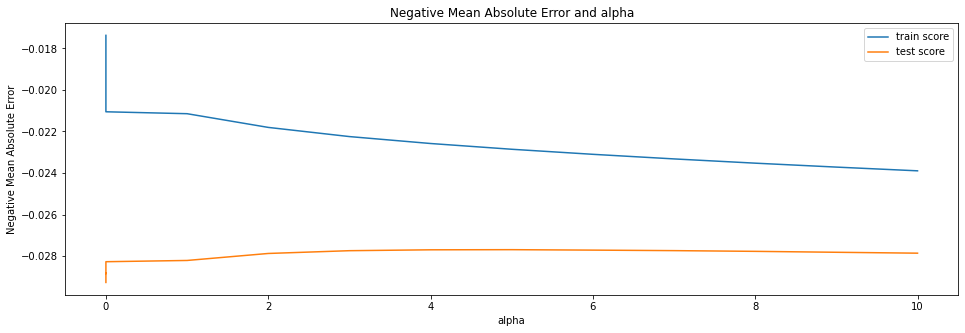

In [587]:
cv_res['param_alpha'] = cv_res['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))


plt.plot(cv_res['param_alpha'], cv_res['mean_train_score'])
plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [588]:
best_alpha =5
ridge = Ridge(alpha=best_alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02310431,  0.02414708,  0.01625458,  0.00671825,  0.00552659,
        0.0080852 ,  0.03531985,  0.01553547,  0.00947887,  0.01116952,
        0.0209077 ,  0.0414665 ,  0.06044338, -0.00369717,  0.05804128,
        0.01562572,  0.00431569,  0.02181327,  0.00948066, -0.00361683,
       -0.02081574,  0.00798863,  0.00957541,  0.0141885 ,  0.00186692,
        0.01666746, -0.00012994,  0.00497316,  0.01135271,  0.00843983,
        0.00691488, -0.00022831, -0.00042859, -0.00399216,  0.01390933,
        0.01012469,  0.00887995,  0.00302887,  0.01310812,  0.00516521,
       -0.02206234, -0.0013579 ,  0.02301834,  0.02161931,  0.01928902,
       -0.0086497 ,  0.01048417, -0.01264254, -0.01281425, -0.00349384,
        0.00115247,  0.00713083, -0.00268428, -0.0083909 , -0.00032763,
        0.00493716, -0.0054559 ,  0.02535171, -0.02385485, -0.01256223,
       -0.0116492 , -0.0030499 , -0.01800876, -0.01367798, -0.00218238,
       -0.01379377,  0.0689689 ,  0.03558032, -0.01463904, -0.00

In [589]:
#Calculate R2 value

y_train_predicted = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predicted))

0.890435473007362


In [590]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8780659130587526


In [591]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)

model_parameters = [round(param, 3) for param in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', -0.077),
 ('MSSubClass', -0.023),
 ('LotArea', 0.024),
 ('OverallQual', 0.016),
 ('OverallCond', 0.007),
 ('YearBuilt', 0.006),
 ('YearRemodAdd', 0.008),
 ('MasVnrArea', 0.035),
 ('BsmtFinSF1', 0.016),
 ('BsmtFinSF2', 0.009),
 ('BsmtUnfSF', 0.011),
 ('TotalBsmtSF', 0.021),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.06),
 ('LowQualFinSF', -0.004),
 ('GrLivArea', 0.058),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.022),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', 0.008),
 ('Fireplaces', 0.01),
 ('GarageCars', 0.014),
 ('GarageArea', 0.002),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.005),
 ('3SsnPorch', 0.011),
 ('ScreenPorch', 0.008),
 ('PoolArea', 0.007),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.004),
 ('MSZoning_FV', 0.014),
 ('MSZoning_RH', 0.01),
 ('MSZoning_RL', 0.009),
 ('MSZoning_RM', 0.003),
 ('Street_Pave', 0.013),
 ('LotShape_IR2', 0.005),
 ('LotShape_IR3',

In [592]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
67,Neighborhood_NoRidge,0.069
114,RoofMatl_WdShngl,0.063
13,2ndFlrSF,0.060
15,GrLivArea,0.058
12,1stFlrSF,0.041
68,Neighborhood_NridgHt,0.036
7,MasVnrArea,0.035
74,Neighborhood_StoneBr,0.029
167,BsmtExposure_Gd,0.028
135,Exterior2nd_ImStucc,0.026


### Lasso

In [593]:


lasso = Lasso()

gs_cv = GridSearchCV(estimator = lasso, 
                        param_grid = param_grid, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
gs_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [594]:
#check optimum parameters
print(gs_cv.best_params_)
print(gs_cv.best_score_)

{'alpha': 0.0001}
-0.02671079443806529


In [595]:
cv_res = pd.DataFrame(gs_cv.cv_results_)
cv_res = cv_res[cv_res['param_alpha']<= 1]
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025653,0.001861,0.004773,0.000655,0.0001,{'alpha': 0.0001},-0.025124,-0.028633,-0.027824,-0.025761,-0.026212,-0.026711,0.001312,1,-0.022264,-0.021433,-0.022049,-0.019807,-0.022902,-0.021691,0.001052
1,0.017297,0.000622,0.004415,0.000837,0.001,{'alpha': 0.001},-0.032131,-0.033796,-0.032965,-0.032650,-0.031321,-0.032573,0.000827,2,-0.031128,-0.030638,-0.030644,-0.031061,-0.030830,-0.030860,0.000204
2,0.014520,0.000991,0.003720,0.000881,0.01,{'alpha': 0.01},-0.043345,-0.043788,-0.044446,-0.042072,-0.041675,-0.043065,0.001042,3,-0.043048,-0.042594,-0.042466,-0.043074,-0.043025,-0.042841,0.000258
3,0.014917,0.002321,0.003924,0.000503,0.05,{'alpha': 0.05},-0.054234,-0.054091,-0.053683,-0.045896,-0.052764,-0.052134,0.003161,4,-0.052470,-0.051865,-0.051228,-0.051430,-0.052460,-0.051890,0.000512
4,0.014386,0.001170,0.003746,0.000634,0.1,{'alpha': 0.1},-0.074819,-0.071865,-0.072333,-0.060721,-0.073761,-0.070700,0.005098,5,-0.070959,-0.070135,-0.070520,-0.070240,-0.071214,-0.070614,0.000414
5,0.015067,0.001849,0.003848,0.000744,0.2,{'alpha': 0.2},-0.085304,-0.082521,-0.083279,-0.073689,-0.084779,-0.081915,0.004233,6,-0.081104,-0.081165,-0.081643,-0.083899,-0.081542,-0.081871,0.001035
6,0.014881,0.002342,0.004256,0.000972,0.3,{'alpha': 0.3},-0.085304,-0.082521,-0.083279,-0.073689,-0.084779,-0.081915,0.004233,6,-0.081104,-0.081165,-0.081643,-0.083899,-0.081542,-0.081871,0.001035
7,0.015721,0.001306,0.003733,0.000736,0.4,{'alpha': 0.4},-0.085304,-0.082521,-0.083279,-0.073689,-0.084779,-0.081915,0.004233,6,-0.081104,-0.081165,-0.081643,-0.083899,-0.081542,-0.081871,0.001035
8,0.015523,0.001565,0.004217,0.000439,0.5,{'alpha': 0.5},-0.085304,-0.082521,-0.083279,-0.073689,-0.084779,-0.081915,0.004233,6,-0.081104,-0.081165,-0.081643,-0.083899,-0.081542,-0.081871,0.001035
9,0.015478,0.000848,0.003280,0.000744,0.6,{'alpha': 0.6},-0.085304,-0.082521,-0.083279,-0.073689,-0.084779,-0.081915,0.004233,6,-0.081104,-0.081165,-0.081643,-0.083899,-0.081542,-0.081871,0.001035


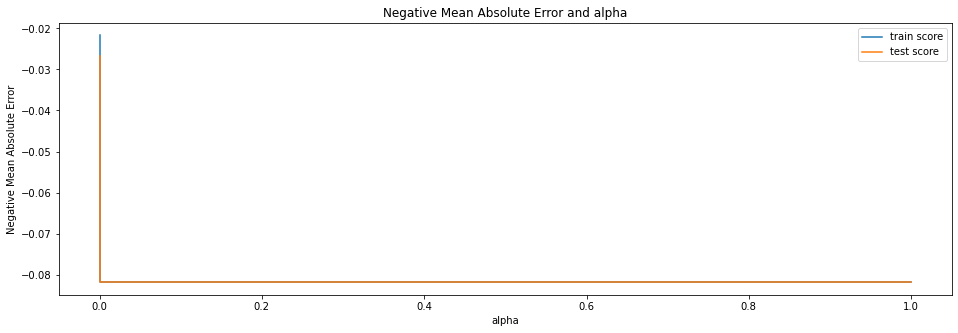

In [596]:
cv_res['param_alpha'] = cv_res['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))


plt.plot(cv_res['param_alpha'], cv_res['mean_train_score'])
plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [597]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

y_train_predicted = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predicted))

0.8970574106162768


In [598]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8827985682887172


In [599]:

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.03536824137094302


In [600]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)

model_parameters = [round(param, 3) for param in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', -0.063),
 ('MSSubClass', -0.028),
 ('LotArea', 0.029),
 ('OverallQual', 0.014),
 ('OverallCond', 0.007),
 ('YearBuilt', 0.013),
 ('YearRemodAdd', 0.006),
 ('MasVnrArea', 0.038),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.034),
 ('LowQualFinSF', -0.006),
 ('GrLivArea', 0.267),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.016),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', 0.004),
 ('Fireplaces', 0.007),
 ('GarageCars', 0.013),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.004),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.002),
 ('MSZoning_FV', 0.008),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.005),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.008),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.026),
 ('LotS

In [601]:


mod_lasso = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_lasso)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
15,GrLivArea,0.267
114,RoofMatl_WdShngl,0.128
67,Neighborhood_NoRidge,0.078
68,Neighborhood_NridgHt,0.047
7,MasVnrArea,0.038
74,Neighborhood_StoneBr,0.035
13,2ndFlrSF,0.034
167,BsmtExposure_Gd,0.031
108,RoofMatl_CompShg,0.031
2,LotArea,0.029


The above variables best explain the SalePrice. 

## End

#### Optional work to understand how  a model using  (RFE) works

In [602]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10) 

rfe = rfe.fit(X_train, y_train)


list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 37),
 ('LotArea', False, 6),
 ('OverallQual', False, 68),
 ('OverallCond', False, 87),
 ('YearBuilt', False, 5),
 ('YearRemodAdd', False, 173),
 ('MasVnrArea', False, 36),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 43),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 26),
 ('GrLivArea', False, 13),
 ('BsmtFullBath', False, 120),
 ('BsmtHalfBath', False, 176),
 ('FullBath', False, 126),
 ('HalfBath', False, 188),
 ('BedroomAbvGr', False, 96),
 ('KitchenAbvGr', False, 23),
 ('TotRmsAbvGrd', False, 183),
 ('Fireplaces', False, 113),
 ('GarageCars', False, 121),
 ('GarageArea', False, 11),
 ('WoodDeckSF', False, 104),
 ('OpenPorchSF', False, 209),
 ('EnclosedPorch', False, 108),
 ('3SsnPorch', False, 148),
 ('ScreenPorch', False, 158),
 ('PoolArea', False, 10),
 ('MiscVal', False, 127),
 ('MoSold', False, 203),
 ('YrSold', False, 195),
 ('MSZoning_FV', False, 57),
 ('MSZoning_RH', 

In [603]:
#pick the variables selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['TotalBsmtSF', '1stFlrSF', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object')

In [604]:
X_train_rfe = X_train[rfe_cols]

In [605]:
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()  
lm1.summary()


C:\Users\ssiva\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     94.81
Date:                Wed, 18 May 2022   Prob (F-statistic):          9.77e-138
Time:                        20:12:02   Log-Likelihood:                 1114.0
No. Observations:                1021   AIC:                            -2206.
Df Residuals:                    1010   BIC:                            -2152.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8804      0.090     -9.836      0.000      -1.056      -0.705
TotalBsmtSF          0.6937      0.058     11.861      0.000       0.579       0.808
1stFlrSF             0.3604      0.048      7.547      0.000       0.267       0.454
Condition2_PosN     -0.1538      0.059     -2.618      0.009      -0.269      -0.039
RoofMatl_CompShg     0.8984      0.087     10.307      0.000       0.727       1.069
RoofMatl_Membran     0.9274      0.119      7.796      0.000       0.694       1.161
RoofMatl_Metal       0.9240      0.120      7.724      0.000       0.689       1.159
RoofMatl_Roll        0.8704      0.120      7.275      0.000       0.636       1.105
RoofMatl_Tar&Grv     0.8595      0.092      9.378      0.000       0.680       1.039
RoofMatl_WdShake     0.9255      0.096      9.612      0.000       0.737       1.114
RoofMatl_WdShngl     1.0416      0.094     11.027      0.000       0.856       1.227
==============================================================================
Omnibus:                      264.574   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1021.921
Skew:                           1.189   Prob(JB):                    1.24e-222
Kurtosis:                       7.285   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check Variance Inflation Factor (VIF)

In [606]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVif(X):
      vif = pd.DataFrame()
      vif['Features'] = X.columns
      vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      vif['VIF'] = round(vif['VIF'], 2)
      vif = vif.sort_values(by = "VIF", ascending = False)
      return vif           

vif = calculateVif(X_train_rfe)

vif

,Features,VIF
0,TotalBsmtSF,17.75
1,1stFlrSF,15.00
3,RoofMatl_CompShg,5.99
9,RoofMatl_WdShngl,1.08
8,RoofMatl_WdShake,1.06
7,RoofMatl_Tar&Grv,1.05
2,Condition2_PosN,1.03
4,RoofMatl_Membran,1.01
5,RoofMatl_Metal,1.00
6,RoofMatl_Roll,1.00


## Model2 Drop feature TotalBsmtSF with high VIF

In [607]:
#Drop humidity with high VIF
X_train2 = X_train_rfe.drop(["TotalBsmtSF"], axis = 1)
X_train_lm2 = sm.add_constant(X_train2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     78.82
Date:                Wed, 18 May 2022   Prob (F-statistic):          2.24e-110
Time:                        20:12:02   Log-Likelihood:                 1047.5
No. Observations:                1021   AIC:                            -2075.
Df Residuals:                    1011   BIC:                            -2026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6294      0.093  

C:\Users\ssiva\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [608]:
#Calculate VIF

vif = calculateVif(X_train2)

vif

,Features,VIF
0,1stFlrSF,5.16
2,RoofMatl_CompShg,4.91
8,RoofMatl_WdShngl,1.07
6,RoofMatl_Tar&Grv,1.05
7,RoofMatl_WdShake,1.05
1,Condition2_PosN,1.03
3,RoofMatl_Membran,1.01
4,RoofMatl_Metal,1.00
5,RoofMatl_Roll,1.00


### Model Fit
Now the all the VIF values are < 5 and p values are < 0.05 and the model is good to go

In [609]:
#plt.scatter(X_train, y_train)
#plt.show
y_train.size

1021

## Residual Analysis

C:\Users\ssiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


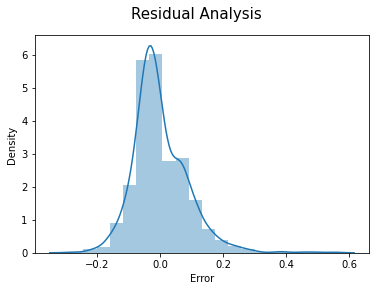

In [610]:
y_train_pred = lm2.predict(X_train_lm2)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 15)                 
plt.xlabel('Error', fontsize = 10)     

plt.show()

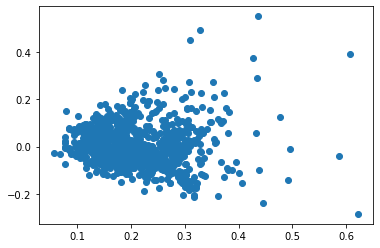

In [611]:
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.show()

### Making Prediction

In [612]:
#Do the same scaling on the test set

#Fit on data
#house_test[num_vars] = scaler.fit_transform(house_test[num_vars])
#house_test.head()

C:\Users\ssiva\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


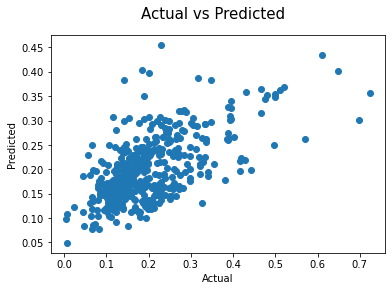

In [614]:
#Divide in to X and y

#y_test = house_test.pop('SalePrice')
#X_test = house_test


X_test_lm = X_test[X_train2.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

y_test_pred = lm2.predict(X_test_lm)

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predicted', fontsize=15)            
plt.xlabel('Actual', fontsize=10)                         
plt.ylabel('Predicted', fontsize=10)   

plt.show()

In [615]:
#Calculate r2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_test_pred)

print('r2 = ', r2_score)
#Calculate adjusted r2 score
#adjusted_r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

n = X_test.size
p = X_test_lm.columns.size-1 #Substract the constant)
print("n = ",n)
print("p = ",p)
adj_r2=1-(1-r2_score)*(n-1)/(n-p-1)
print("adjusted r2 = ",adj_r2)

r2 =  0.3798853509688692
n =  96360
p =  9
adjusted r2 =  0.3798274264038326
